# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Initial imports
import nltk
nltk.download('vader_lexicon')

import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

from newsapi.newsapi_client import NewsApiClient
from pandas.io.json import json_normalize
from datetime import datetime, timedelta

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gmurn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# Reading the News API key enviroment variable
my_key = os.getenv("news_api_key")

In [5]:
my_key

'cfedaab6674f4ba6aeb53cec310977be'

In [6]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=my_key)

In [7]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="Bitcoin", from_param = "2020-11-14", to = "2020-13-10", language="en") # Can only go back 1 month
bitcoin_headlines['totalResults']

4558

In [8]:
# Fetch the Ethereum news articles
ETH_headlines = newsapi.get_everything(q="Ethereum", from_param = "2020-11-14", to = "2020-13-10", language="en") # Can only go back 1 month
ETH_headlines['totalResults']
# ETH_headlines['articles']

1233

In [9]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gmurn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for x in bitcoin_headlines["articles"]:
    try:
        text = x["content"]
        date = x["publishedAt"][:10]
        sentiment = vader.polarity_scores(text) # Get the score of the text
        
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [11]:
# Create Bitcoin DataFrame
bitcoin_sentiments_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
bitcoin_sentiments_df = bitcoin_sentiments_df[cols]

bitcoin_sentiments_df.head()

,compound,negative,neutral,positive,text
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."
2,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."
3,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...
4,0.0000,0.000,1.000,0.000,Six years after the launch of the Mexico-based...


In [15]:
# Drop duplicate stories

bitcoin_sentiments_df = bitcoin_sentiments_df.drop_duplicates()
bitcoin_sentiments_df.head()

,compound,negative,neutral,positive,text
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."
2,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."
3,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...
4,0.0000,0.000,1.000,0.000,Six years after the launch of the Mexico-based...


In [16]:
# Create the Ethereum sentiment scores DataFrame
ETH_sentiments = []

for x in ETH_headlines["articles"]:
    try:
        text = x["content"]
        date = x["publishedAt"][:10]
        sentiment = vader.polarity_scores(text) # Get the score of the text
        
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ETH_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [17]:
# Create Ethereum DataFrame
ETH_sentiments_df = pd.DataFrame(ETH_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
ETH_sentiments_df = ETH_sentiments_df[cols]

ETH_sentiments_df.head()

,compound,negative,neutral,positive,text
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...
4,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...


In [18]:
# Drop duplicate stories

ETH_sentiments_df = ETH_sentiments_df.drop_duplicates()
ETH_sentiments_df.head()

,compound,negative,neutral,positive,text
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...
5,0.8779,0.0,0.682,0.318,"PayPal has launched the Generosity Network, a ..."
6,0.0000,0.0,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A representati...


In [19]:
# Describe the Bitcoin Sentiment from the DataFrame
bitcoin_sentiments_df.describe()

,compound,negative,neutral,positive
count,17.000000,17.000000,17.000000,17.000000
mean,0.217365,0.004412,0.938882,0.056706
std,0.273078,0.018190,0.079145,0.070990
min,0.000000,0.000000,0.773000,0.000000
25%,0.000000,0.000000,0.883000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.421500,0.000000,1.000000,0.117000
max,0.765000,0.075000,1.000000,0.174000


In [20]:
# Describe the Ethereum Sentiment from the DataFrame
ETH_sentiments_df.describe()

,compound,negative,neutral,positive
count,17.000000,17.000000,17.000000,17.000000
mean,0.110618,0.030294,0.904882,0.064824
std,0.323321,0.058126,0.109575,0.080122
min,-0.493900,0.000000,0.672000,0.000000
25%,0.000000,0.000000,0.878000,0.000000
50%,0.000000,0.000000,0.912000,0.070000
75%,0.226300,0.047000,1.000000,0.088000
max,0.877900,0.196000,1.000000,0.318000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum with a mean positive score of 0.072684.

Q: Which coin had the highest compound score?

A: Ethereum with a max compound score of 0.860400.

Q. Which coin had the highest positive score?

A: Ethereum with a max positive score of 0.268000.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [21]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [22]:
# Expand the default stopwords list if necessary

stopwords_additional = {'manag', 'char', 'reuters'} # Additional stopwords to add

In [23]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [24]:
# Complete the tokenizer function

def tokenizer(text):
    """Tokenizes text."""
    tokens_list=[]
    stopwords_list = set(stopwords.words('english')).union(stopwords_additional) # create stopwords list
    alpha_characters = re.compile("[^a-zA-Z ]") # clean up
    for each_text in text: 
        
        clean_up = alpha_characters.sub(' ', each_text) # get rid of non-alpha characters
        words = word_tokenize(clean_up)
        lem = [lemmatizer.lemmatize(x) for x in words]
        tokens = [x.lower() for x in lem if x.lower() not in stopwords_list]
        tokens_list.append(tokens)
    return tokens_list

In [25]:
# Create a new tokens column for bitcoin

BTC = tokenizer(bitcoin_sentiments_df['text'])
bitcoin_sentiments_df['tokens'] = BTC
bitcoin_sentiments_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[visa, ha, partnered, cryptocurrency, startup,..."
1,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, two, month, ra..."
2,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, conventional, cryptocurrencies, centr..."
3,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...,"[youve, watching, crypto, market, past, week, ..."
4,0.0000,0.000,1.000,0.000,Six years after the launch of the Mexico-based...,"[six, year, launch, mexico, based, crypotcurre..."


In [26]:
# Create a new tokens column for ethereum

ETH = tokenizer(ETH_sentiments_df['text'])
ETH_sentiments_df['tokens'] = ETH
ETH_sentiments_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[london, digital, currency, ethereum, xrp, soa..."
3,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...,"[new, york, institutional, investor, pumped, m..."
5,0.8779,0.0,0.682,0.318,"PayPal has launched the Generosity Network, a ...","[paypal, ha, launched, generosity, network, pl..."
6,0.0000,0.0,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A representati...,"[staff, file, photo, representation, virtual, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [27]:
from collections import Counter
from nltk import ngrams

In [28]:
# Append all BTC articles

all_grams=[]
for idx, each_tokens in bitcoin_sentiments_df['tokens'].iteritems(): # series.iteritems returns (index, value)
    all_grams=all_grams+each_tokens

vCounter_BTC=Counter(ngrams(all_grams, n=2))
# print(dict(vCounter_BTC))

In [29]:
# Generate the Bitcoin N-grams where N=2

vCounter_BTC = Counter(ngrams(bitcoin_sentiments_df['tokens'][0], n=2))
vCounter_BTC
# print(dict(vCounter_BTC))

Counter({('visa', 'ha'): 1,
         ('ha', 'partnered'): 1,
         ('partnered', 'cryptocurrency'): 1,
         ('cryptocurrency', 'startup'): 1,
         ('startup', 'blockfi'): 1,
         ('blockfi', 'offer'): 1,
         ('offer', 'first'): 1,
         ('first', 'reward'): 1,
         ('reward', 'credit'): 1,
         ('credit', 'card'): 1,
         ('card', 'pay'): 1,
         ('pay', 'bitcoin'): 1,
         ('bitcoin', 'rather'): 1,
         ('rather', 'cash'): 1,
         ('cash', 'worth'): 1,
         ('worth', 'applying'): 1,
         ('applying', 'unless'): 1,
         ('unless', 'youre'): 1,
         ('youre', 'extremely'): 1,
         ('extremely', 'bullish'): 1})

In [30]:
# Append all ETH articles

all_ETH_grams=[]
for idx, each_ETH_tokens in ETH_sentiments_df['tokens'].iteritems(): # series.iteritems returns (index, value)
    all_ETH_grams=all_ETH_grams+each_ETH_tokens

vCounter_ETH=Counter(ngrams(all_ETH_grams, n=2))
# print(dict(vCounter_ETH))

In [31]:
# Generate the Ethereum N-grams where N=2

vCounter_ETH = Counter(ngrams(ETH_sentiments_df['tokens'][0], n=2))
vCounter_ETH
# print(dict(vCounter_ETH))

Counter({('file', 'photo'): 1,
         ('photo', 'representation'): 1,
         ('representation', 'ethereum'): 1,
         ('ethereum', 'virtual'): 1,
         ('virtual', 'currency'): 1,
         ('currency', 'standing'): 1,
         ('standing', 'pc'): 1,
         ('pc', 'motherboard'): 1,
         ('motherboard', 'seen'): 1,
         ('seen', 'illustration'): 1,
         ('illustration', 'picture'): 1,
         ('picture', 'february'): 1,
         ('february', 'dado'): 1,
         ('dado', 'ruvic'): 1,
         ('ruvic', 'illustration'): 1,
         ('illustration', 'london'): 1})

In [32]:
# print(dict(vCounter_BTC.most_common(10)))
vCounter_BTC.most_common(10)

[(('visa', 'ha'), 1),
 (('ha', 'partnered'), 1),
 (('partnered', 'cryptocurrency'), 1),
 (('cryptocurrency', 'startup'), 1),
 (('startup', 'blockfi'), 1),
 (('blockfi', 'offer'), 1),
 (('offer', 'first'), 1),
 (('first', 'reward'), 1),
 (('reward', 'credit'), 1),
 (('credit', 'card'), 1)]

In [33]:
# print(dict(vCounter_ETH.most_common(10)))
vCounter_ETH.most_common(10)

[(('file', 'photo'), 1),
 (('photo', 'representation'), 1),
 (('representation', 'ethereum'), 1),
 (('ethereum', 'virtual'), 1),
 (('virtual', 'currency'), 1),
 (('currency', 'standing'), 1),
 (('standing', 'pc'), 1),
 (('pc', 'motherboard'), 1),
 (('motherboard', 'seen'), 1),
 (('seen', 'illustration'), 1)]

In [34]:
# Use the token_count function to generate the top 10 words from each coin

def token_count(tokens, N=10):
    all_tokens=[]
    for each_token in tokens: 
        all_tokens=all_tokens+each_token
    """Returns the top N tokens from the frequency count"""
    return Counter(all_tokens).most_common(N)

In [35]:
# Get the top 10 words for Bitcoin

token_count(BTC)

[('bitcoin', 14),
 ('illustration', 9),
 ('currency', 8),
 ('ha', 6),
 ('file', 6),
 ('photo', 6),
 ('virtual', 6),
 ('november', 5),
 ('taken', 5),
 ('dado', 5)]

In [36]:
# Get the top 10 words for Ethereum

token_count(ETH)

[('bitcoin', 13),
 ('illustration', 12),
 ('currency', 8),
 ('file', 7),
 ('photo', 7),
 ('virtual', 7),
 ('representation', 6),
 ('dado', 6),
 ('ruvic', 6),
 ('london', 6)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [38]:
# Process text for wordcloud creation
# creates a big string instead of a list

all_tokens_BTC=[]
for each_token_BTC in BTC: 
    all_tokens_BTC=all_tokens_BTC+each_token_BTC
    
BTC_big_string = ' '.join(all_tokens_BTC)

# BTC_big_string = ' '.join(all_tokens_BTC)

all_tokens_ETH=[]
for each_token_ETH in ETH: 
    all_tokens_ETH=all_tokens_ETH+each_token_ETH
    
ETH_big_string = ' '.join(all_tokens_ETH)

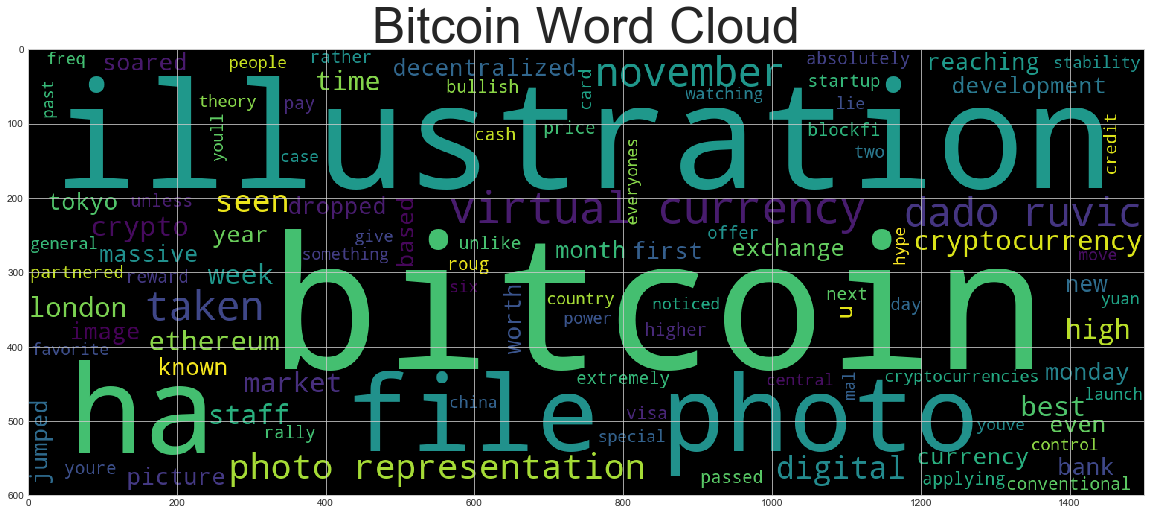

In [39]:
# Generate the Bitcoin word cloud

BTC_wc = WordCloud(width=1500, height=600, max_words=100).generate(BTC_big_string)
plt.title('Bitcoin Word Cloud', fontsize=50, fontweight=5)
plt.imshow(BTC_wc)

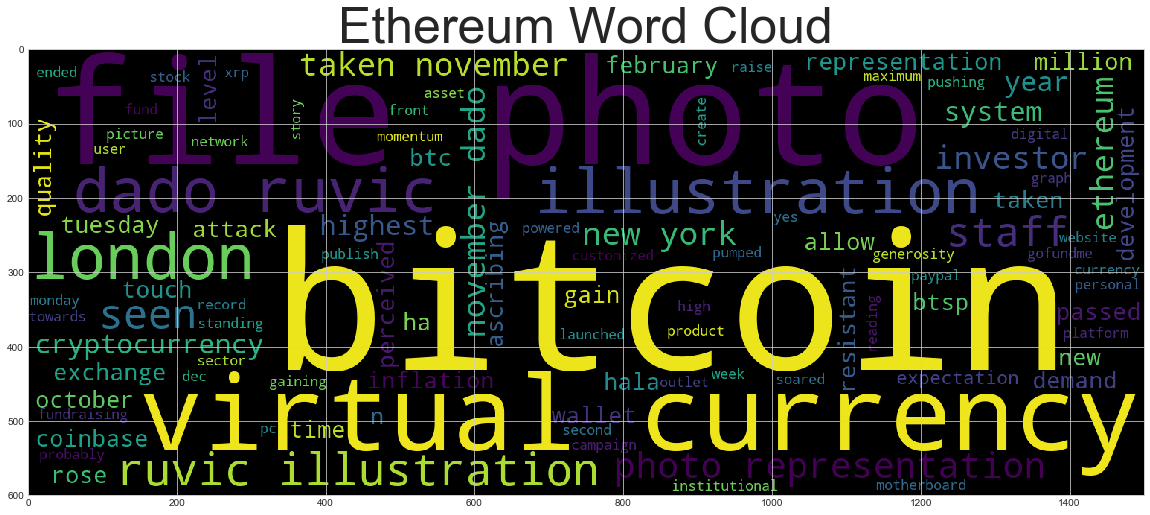

In [40]:
# Generate the Ethereum word cloud

ETH_wc = WordCloud(width=1500, height=600, max_words=100).generate(ETH_big_string)
plt.title('Ethereum Word Cloud', fontsize=50, fontweight=5)
plt.imshow(ETH_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [41]:
import spacy
from spacy import displacy

In [42]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [43]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [44]:
# Concatenate all of the bitcoin text together
BTC_processed_sentence = nlp(BTC_big_string)

BTC_processed_sentence

visa ha partnered cryptocurrency startup blockfi offer first reward credit card pay bitcoin rather cash worth applying unless youre extremely bullish november absolutely massive two month rally bitcoin passed first time next day soared even higher reaching price roug unlike conventional cryptocurrencies central bank control digital yuan case people bank china move give country power theory stability freq youve watching crypto market past week youll noticed something special bitcoin everyones favorite decentralized digital currency based hype lie general mal six year launch mexico based crypotcurrency exchange financial service platform bitso company revealed ha closed million financing capitalize crypto decentralized exchange protocol allow crypto trader investor trade across different blockhains development significant new development come la u market ended november large gain even small decline today amp p jumped percent november best monthly showing since april fourth best month mai

In [45]:
# Run the NER processor on all of the text
BTC_doc = nlp(BTC_big_string)

# Add a title to the document
print('Bitcoin NER')

# Render the visualization
displacy.render(BTC_doc, style='ent')

Bitcoin NER


In [46]:
# List all BTC Entities

for ent in BTC_processed_sentence.ents:
    print(ent.text, ent.label_)

visa ORG
first ORDINAL
bitcoin GPE
november DATE
two month DATE
bitcoin PERSON
first ORDINAL
next day DATE
central bank ORG
digital yuan ORG
past week DATE
bitcoin GPE
hype lie ORG
six year DATE
mexico GPE
november DATE
today DATE
november DATE
monthly DATE
april fourth best month DATE
williams PERSON
arya stark PERSON
lady catelyn lord PERSON
eddard acolyte PERSON
monday DATE
bitcoin GPE
tuesday DATE
evening TIME
december DATE
prior week bitcoin ORG
tom wilson PERSON
chavez justin PERSON
bbc news ORG
bitcoin GPE
three year DATE
bitcoin GPE
november DATE
dado ruvic ORG
tokyo GPE
february DATE
dado ruvic ORG
london GPE
london digital currency ethereum ORG
monday DATE
london GPE
november DATE
dado ruvic ORG
tokyo GPE


---

## Ethereum NER

In [47]:
# Concatenate all of the ethereum text together

ETH_processed_sentence = nlp(ETH_big_string)
ETH_processed_sentence

file photo representation ethereum virtual currency standing pc motherboard seen illustration picture february dado ruvic illustration london london digital currency ethereum xrp soared monday gaining momentum bitcoin powered towards time high file photo representation ethereum virtual currency new york institutional investor pumped million cryptocurrency fund product week ended dec second highest record pushing sector asset paypal ha launched generosity network platform allows user create customized personal fundraising campaign yes like gofundme raise maximum staff file photo representation virtual currency bitcoin seen front stock graph illustration taken november dado ruvic illustration file photo new york times probably publish story cryptocurrency exchange coinbase reading news outlet website coinbase ha taken highly un decentralized exchange protocol allow crypto trader investor trade across different blockhains development significant new development come la attack growing numb

In [48]:
# Run the NER processor on all of the text
ETH_doc = nlp(ETH_big_string)

# Add a title to the document
print('Ethereum NER')

# Render the visualization
displacy.render(ETH_doc, style='ent')

Ethereum NER


In [49]:
# List all ETH Entities

for ent in ETH_processed_sentence.ents:
    print(ent.text, ent.label_)

february DATE
dado ruvic ORG
london GPE
london digital currency ethereum ORG
monday DATE
new york GPE
million CARDINAL
week ended DATE
second ORDINAL
november DATE
dado ruvic ORG
new york GPE
un decentralized exchange ORG
early february year DATE
one CARDINAL
last month DATE
october DATE
million CARDINAL
november DATE
dado ruvic ORG
new york GPE
bitcoin btc btsp ORG
november DATE
dado ruvic ORG
new york GPE
bitcoin btc btsp ORG
dado ruvic ORG
london GPE
november DATE
dado ruvic ORG
london GPE
bitcoin hala systems ORG
hedera ORG
syrians NORP
hala NORP
bitcoin GPE
tech center FAC
sunnyvale GPE
california GPE
october DATE
stephen lam ul li bitcoin PERSON
eth fee ethereum cryptocurrency ORG
tuesday DATE
london GPE
tuesday DATE
